# 📉 Modelo 2: Regressão Linear com apenas o IMC

## 🎯 Objetivo
Treinar e avaliar um modelo de regressão linear simples usando apenas o IMC como variável explicativa.

## 📦 Etapa 1: Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## 📂 Etapa 2: Carregar e preparar os dados

In [2]:
df = pd.read_csv("exame_diabes.csv")
df = df.drop(columns=["id_paciente"])
df = pd.get_dummies(df, columns=["genero"], drop_first=True)
# Criar coluna IMC
df["altura_m"] = df["altura"] / 100
df["imc"] = df["peso"] / (df["altura_m"] ** 2)
df = df.drop(columns=["altura_m"])

## 📐 Etapa 3: Separar variáveis

In [3]:
X = df[["imc"]]
y = df["resultado"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🧠 Etapa 4: Treinar modelo

In [4]:
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)
y_pred = modelo2.predict(X_test)

## 📏 Etapa 5: Avaliar métricas

In [5]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R²:", round(r2, 4))
print("MSE:", round(mse, 4))

R²: -0.0567
MSE: 141.831


## 📈 Etapa 6: Visualização da reta de regressão

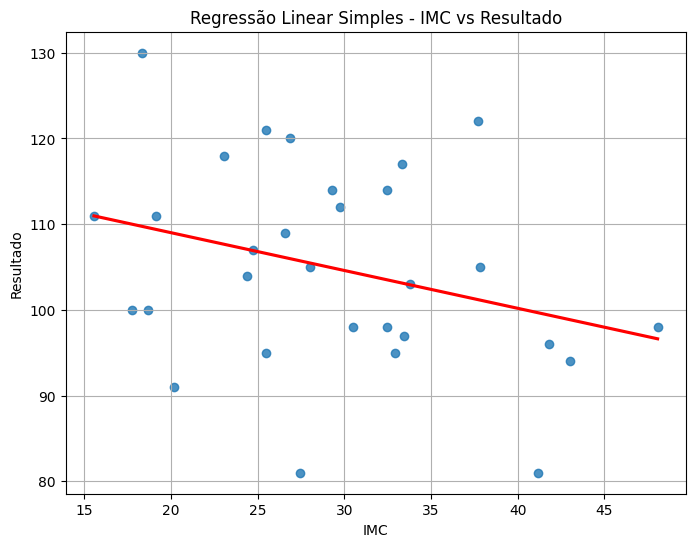

In [6]:
plt.figure(figsize=(8,6))
sns.regplot(x=X_test["imc"], y=y_test, ci=None, line_kws={"color": "red"})
plt.xlabel("IMC")
plt.ylabel("Resultado")
plt.title("Regressão Linear Simples - IMC vs Resultado")
plt.grid(True)
plt.show()

## 📊 Etapa 7: Visualização dos resíduos

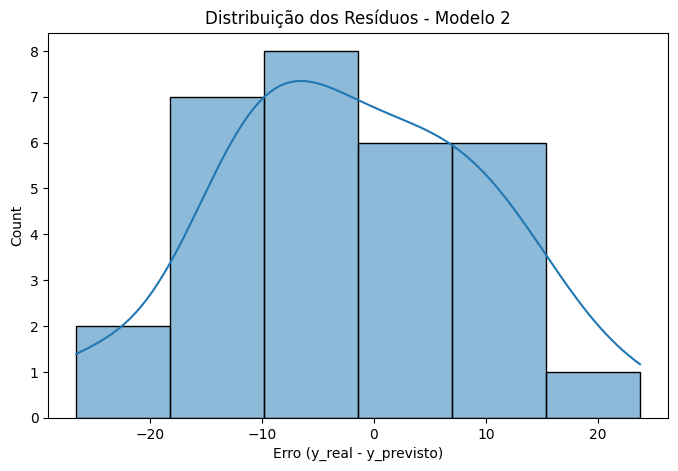

In [7]:
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos - Modelo 2")
plt.xlabel("Erro (y_real - y_previsto)")
plt.show()

## ✅ Conclusão

In [ ]:
- Modelo treinado apenas com a feature **IMC**
- Avaliação com R² e MSE
- Visualização da reta e dos resíduos mostra a capacidade de previsão e possíveis falhas
